# Linear and Logistic Regression
- **100 points**

### Instructions
- you cannot use any other library.Write the code from scratch.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.
- link for the datasets - https://drive.google.com/drive/folders/1MXmIChMxodGbEpowyVJBFLdvaDpj23gd?usp=sharing


## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [1]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [2]:
df = pd.read_csv('./heights.csv')

In [3]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


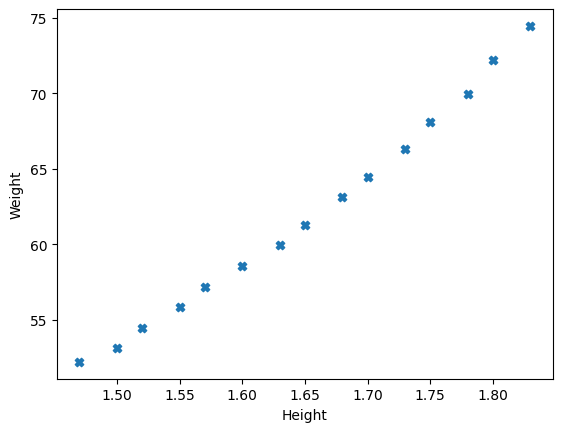

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [5]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [6]:
class LinearRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a linear regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        ######################
        #   YOUR CODE HERE   #
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        ######################
        # You may add additional fields

    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        n_samples, n_features = X.shape
        # Initialize weights randomly or with zeros
        self.weights = np.zeros(n_features)

        # Gradient Descent Loop
        for epoch in range(self.epochs):
            # Calculate predictions
            y_pred = self.predict(X)

            # Compute the gradient
            dw = (-2/n_samples) * X.T.dot(y - y_pred)
            db = (-2/n_samples) * np.sum(y - y_pred)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Optionally print the loss or progress for every few epochs
            if (epoch+1) % 10 == 0:
                loss = np.mean((y_pred - y) ** 2)
                print(f'Epoch [{epoch+1}/{self.epochs}], Loss: {loss:.4f}')
        ######################



    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights using batch gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
        n_samples = X.shape[0]

        # Calculate predictions
        y_pred = self.predict(X)

        # Compute gradients for weights and bias
        dw = (-2/n_samples) * X.T.dot(y - y_pred)
        db = (-2/n_samples) * np.sum(y - y_pred)
        # Update the weights and bias using the learning rate
        self.weights -= self.lr * dw
        self.bias -= self.lr * db
        ######################



    def predict(self, X):
        """
        Predict values using the weights.

        Args:
            X: features

        Returns:
            The predicted value.
        """
        ######################
        #   YOUR CODE HERE   #
        return X.dot(self.weights) + self.bias
        ######################



### Build the model and train on the dataset.

In [7]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

Epoch [10/100000], Loss: 975.4265
Epoch [20/100000], Loss: 217.8514
Epoch [30/100000], Loss: 57.3885
Epoch [40/100000], Loss: 23.3895
Epoch [50/100000], Loss: 16.1746
Epoch [60/100000], Loss: 14.6324
Epoch [70/100000], Loss: 14.2917
Epoch [80/100000], Loss: 14.2055
Epoch [90/100000], Loss: 14.1731
Epoch [100/100000], Loss: 14.1522
Epoch [110/100000], Loss: 14.1338
Epoch [120/100000], Loss: 14.1159
Epoch [130/100000], Loss: 14.0981
Epoch [140/100000], Loss: 14.0803
Epoch [150/100000], Loss: 14.0626
Epoch [160/100000], Loss: 14.0449
Epoch [170/100000], Loss: 14.0273
Epoch [180/100000], Loss: 14.0096
Epoch [190/100000], Loss: 13.9920
Epoch [200/100000], Loss: 13.9744
Epoch [210/100000], Loss: 13.9568
Epoch [220/100000], Loss: 13.9393
Epoch [230/100000], Loss: 13.9218
Epoch [240/100000], Loss: 13.9043
Epoch [250/100000], Loss: 13.8868
Epoch [260/100000], Loss: 13.8693
Epoch [270/100000], Loss: 13.8519
Epoch [280/100000], Loss: 13.8345
Epoch [290/100000], Loss: 13.8171
Epoch [300/100000], L

### (10 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [8]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    ######################
    #   YOUR CODE HERE   #
    return np.mean((y_pred - y_actual) ** 2)
    ######################



### Make predictions using the model and evaluate it.

In [9]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.4994


### Plot the predicted and the actual values.

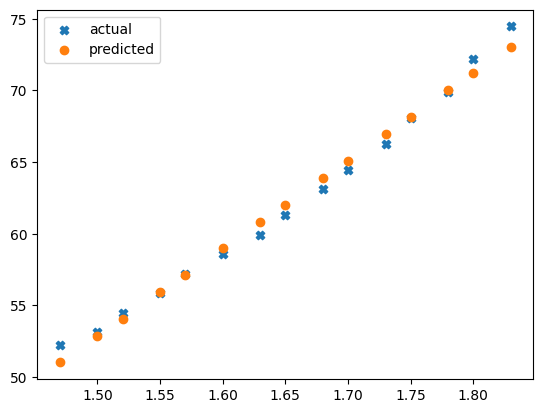

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertise.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [11]:
df = pd.read_csv('./advertise.csv')

In [12]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### Split the data into train and test set.

In [14]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [15]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [16]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [17]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

Epoch [10/100000], Loss: 37512217704814497394332324232155998447934599491223552.0000
Epoch [20/100000], Loss: 2136881775838556073306788154735316635509011025108788839445418822051288494065665832659763744672509214584733696.0000
Epoch [30/100000], Loss: 121727373194597099097769545646995072834467943449114123923821610430149710882753580589894024934990648639260843094152152794770633249754100812363533731357039876867358720.0000
Epoch [40/100000], Loss: 6934194278970838076612273182899357153902755630232201422606222921507920243518457540787231952057035197663461019594701917555972233978119252181103898075956086755005742814882835964777916455223984876553618882527209328075603968.0000
Epoch [50/100000], Loss: 395006061797166476969033543836178869419467173444679066988306585846345547104454009292235744240058072248495073391959094359463391759390724574810158795818281095408617087329283067813290269856346011377958235645914091828075212397040172426514646122390256652330798870037696879662202880.0000
Epoch [60/100000], Los

C:\Users\AMBHRANI RAO\AppData\Local\Temp\ipykernel_29144\1235664233.py:50: RuntimeWarning: overflow encountered in square
  loss = np.mean((y_pred - y) ** 2)


Epoch [5870/100000], Loss: nan
Epoch [5880/100000], Loss: nan
Epoch [5890/100000], Loss: nan
Epoch [5900/100000], Loss: nan
Epoch [5910/100000], Loss: nan
Epoch [5920/100000], Loss: nan
Epoch [5930/100000], Loss: nan
Epoch [5940/100000], Loss: nan
Epoch [5950/100000], Loss: nan
Epoch [5960/100000], Loss: nan
Epoch [5970/100000], Loss: nan
Epoch [5980/100000], Loss: nan
Epoch [5990/100000], Loss: nan
Epoch [6000/100000], Loss: nan
Epoch [6010/100000], Loss: nan
Epoch [6020/100000], Loss: nan
Epoch [6030/100000], Loss: nan
Epoch [6040/100000], Loss: nan
Epoch [6050/100000], Loss: nan
Epoch [6060/100000], Loss: nan
Epoch [6070/100000], Loss: nan
Epoch [6080/100000], Loss: nan
Epoch [6090/100000], Loss: nan
Epoch [6100/100000], Loss: nan
Epoch [6110/100000], Loss: nan
Epoch [6120/100000], Loss: nan
Epoch [6130/100000], Loss: nan
Epoch [6140/100000], Loss: nan
Epoch [6150/100000], Loss: nan
Epoch [6160/100000], Loss: nan
Epoch [6170/100000], Loss: nan
Epoch [6180/100000], Loss: nan
Epoch [6

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [18]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: nan
Test MSE: nan


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [19]:
df = pd.read_csv('./heights_weights.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './heights_weights.csv'

In [ ]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [ ]:
class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a logistic regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        ######################
        #   YOUR CODE HERE   #
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0

        ######################
        # You may add additional fields

    # Function for model training
    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
         n_samples, n_features = X.shape
        # Initialize weights randomly or with zeros
        self.weights = np.zeros(n_features)

        # Gradient Descent Loop
        for epoch in range(self.epochs):
            # Linear combination
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid to get probabilities
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Optionally print the loss or progress for every few epochs
            if (epoch+1) % 10 == 0:
                loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
                print(f'Epoch [{epoch+1}/{self.epochs}], Loss: {loss:.4f}')

        ######################



    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights in gradient descent.

        Args:
            X: features
            y: target
        """
        ######################
        #   YOUR CODE HERE   #
         n_samples = X.shape[0]

        # Linear combination
        linear_model = np.dot(X, self.weights) + self.bias
        # Apply sigmoid to get probabilities
        y_pred = self.sigmoid(linear_model)

        # Compute gradients for weights and bias
        dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
        db = (1/n_samples) * np.sum(y_pred - y)

        # Update the weights and bias using the learning rate
        self.weights -= self.lr * dw
        self.bias -= self.lr * db
        ######################



    def predict(self, X):
        """
        Predict probabilities using the weights.

        Args:
            X: features

        Returns:
            The predicted probability.
        """
        ######################
        #   YOUR CODE HERE   #
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
        ######################



### Build the model and train on the dataset.

In [ ]:
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)

### (20 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [ ]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy.
    """
    ######################
    #   YOUR CODE HERE   #
    # Convert predicted probabilities to binary values (0 or 1)
    y_pred_binary = (y_pred >= 0.5).astype(int)

    # Calculate accuracy: number of correct predictions / total predictions
    correct_predictions = np.sum(y_pred_binary == y_actual)
    total_predictions = len(y_actual)

    return correct_predictions / total_predictions
    ######################



### Make predictions using the model and evaluate it.

In [ ]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

### Plot the predicted and the actual values.

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()